<a href="https://colab.research.google.com/github/LimGuenTaek/pymldg-rev/blob/main/04_%EB%B6%84%EB%A5%98/4_3_%EB%9E%9C%EB%8D%A4_%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Python_Machine_Learning/datasets/UCI HAR Dataset
!ls

/content/drive/MyDrive/Colab Notebooks/Python_Machine_Learning/datasets/UCI HAR Dataset
activity_labels.txt  features_info.txt	features.txt  README.txt  test	train


# 랜덤 포레스트

배깅(bagging)은 앞에서 소개한 보팅과는 다르게 , 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘입니다.

배깅의 대표적인 알고리즘은 랜덤 포레스트입니다. 랜덤 포레스트는 다재 다능한 알고리즘입니다. 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있으며 , 다양한 영역에서 높은 예측 성능을 보이고 있습니다.

랜덤 포레스트의 기반 알고리즘은 결정 트리로서 , 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있습니다. 사실 , 랜덤 포레스트 뿐만 아니라 부스팅 기반의 다양한 앙상블 알고리즘 역시 대부분 결정 트리 알고리즘을 기반 알고리즘으로 채택하고 있습니다.

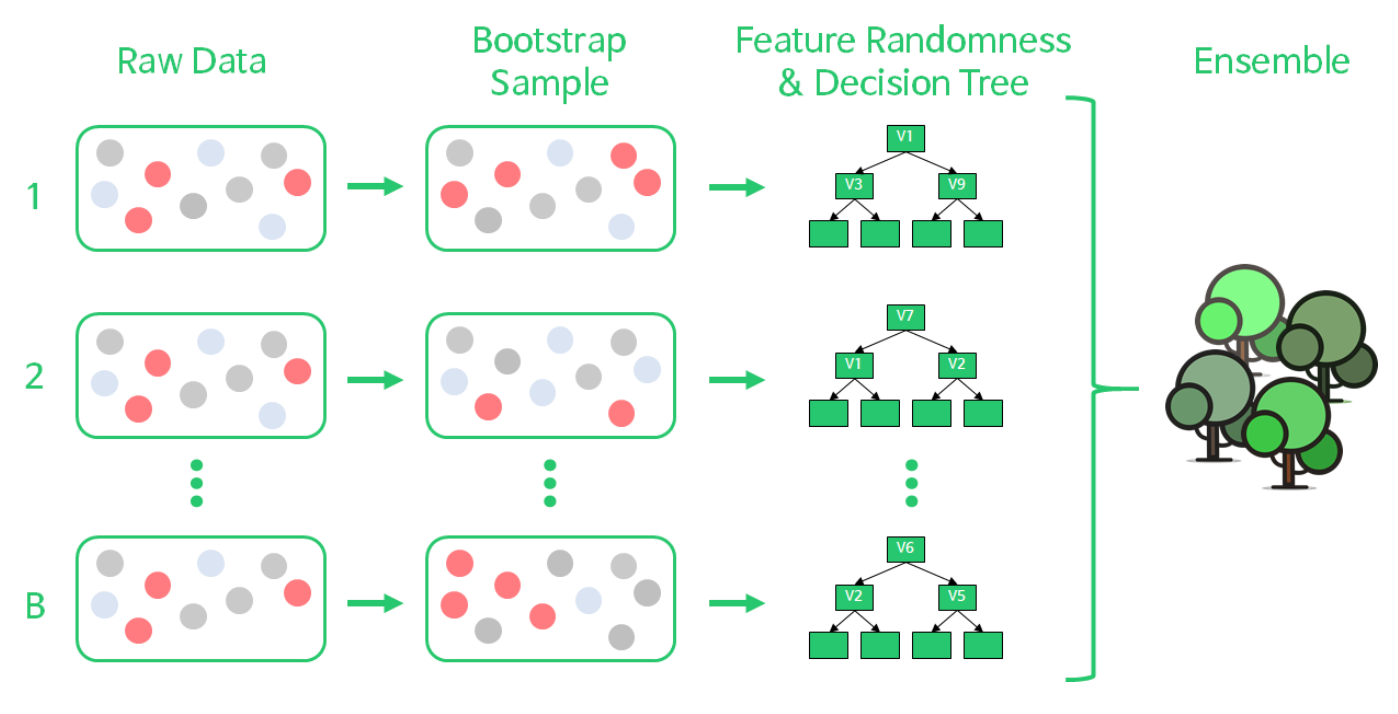

랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됩니다.

랜덤 포레스트는 개별적인 분류기의 기반 알고리즘의 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트입니다. 이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑 분할 방식이라고 합니다. (그래서 Bagging은 bootstrap aggregating의 줄임말 입니다.) 

서브 세트의 데이터 건수는 전체 데이터 건수와 동일하지만 , 개별 데이터가 중첩되어 만들어집니다. 

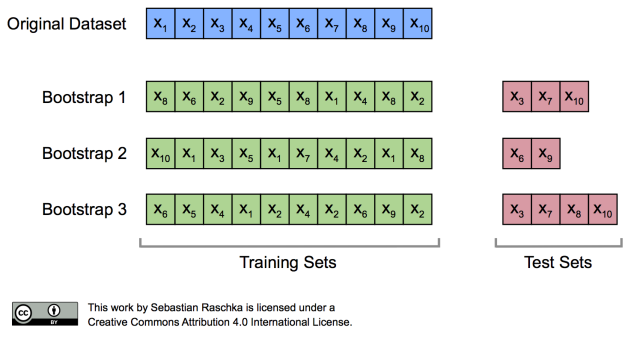

이렇게 데이터가 중첩된 개별 데이터 세트에 결정 트리 분류기를 각각 적용하는 것이 랜덤 포레스트입니다. 

사이킷런은 RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원합니다.

In [ ]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


## 랜덤 포레스트 하이퍼 파라미터 튜닝

트리 기반의 앙상블 알고리즘의 단점을 굳이 뽑자면 하이퍼 파라미터가 너무 많고 그로 인해서 튜닝을 위한 시간이 많이 소모 된다는 것입니다.

더구나 많은 시간을 소모했음에도 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않아서 더욱 아쉽습니다.

트리 기반 자체의 하이퍼 파라미터가 원래 많은 데다 배깅 , 부스팅, 학습 , 정규화 등을 위한 하이퍼 파라미터까지 추가되므로 일반적으로 다른 ML 알고리즘에 비해 많을 수 밖에 없습니다.

그나마 랜덤 포레스트가 적은 편에 속하는데 결정 트리에서 사용되는 하이퍼 파라미터와 같은 파라미터가 대부분이기 때문입니다.

* n_estimators : 랜덤 포레스트에서 결정 트리의 개수를 지정합니다. 디폴트는 10개 입니다. 많이 설정할수록 좋은 성능을 기대할 수 있지만 계속 증가시킨다고 성능이 무조건 향상되는 것은 아닙니다. 또한 늘릴수록 학습 수행 시간이 오래 걸리는 것도 감안해야 합니다.

* max_features : 결정 트리에 사용된 max_feautures 파라미터와 같습니다. 하지만 RandomForestClassifier의 기본 max_features는 None이 아니라 auto 즉 sqrt와 같습니다. 따라서 랜덤 포레스트의 트리를 분할하는 피처를 참조할 때 전체 피처가 아니라 sqrt(전체 피처 개수)만큼 참조 합니다.(전체 피처가 16개라면 분할을 위해 4개 참조)

* max_depth나 , min_sample_leaft와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에도 똑같이 적용될 수 있습니다.

In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [8]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


RandomForestClassifier 역시 DecisionTreeClassifier와 똑같이 feature_importances 속성을 이용해 알고리즘이 선택한 피처의 중요도를 알 수 있습니다.

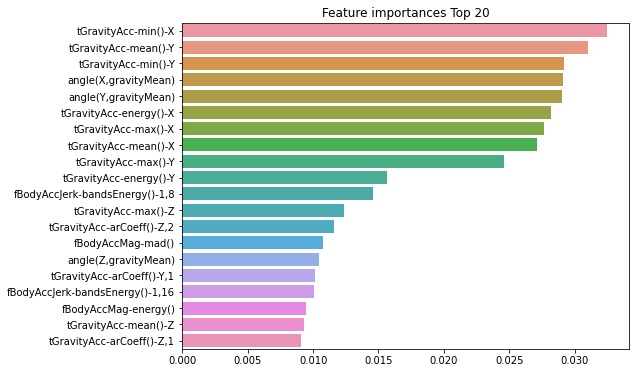

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()